In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2 as cv
import zipfile
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!wget https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/TrainIJCNN2013.zip

--2024-12-09 10:57:43--  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/TrainIJCNN2013.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104177081 (1.0G) [application/zip]
Saving to: ‘TrainIJCNN2013.zip’

TrainIJCNN2013.zip  100%[===================>]   1.03G  28.3MB/s    in 39s     

2024-12-09 10:58:23 (26.8 MB/s) - ‘TrainIJCNN2013.zip’ saved [1104177081/1104177081]



In [ ]:
with zipfile.ZipFile('/content/TrainIJCNN2013.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

(800, 1360, 3)


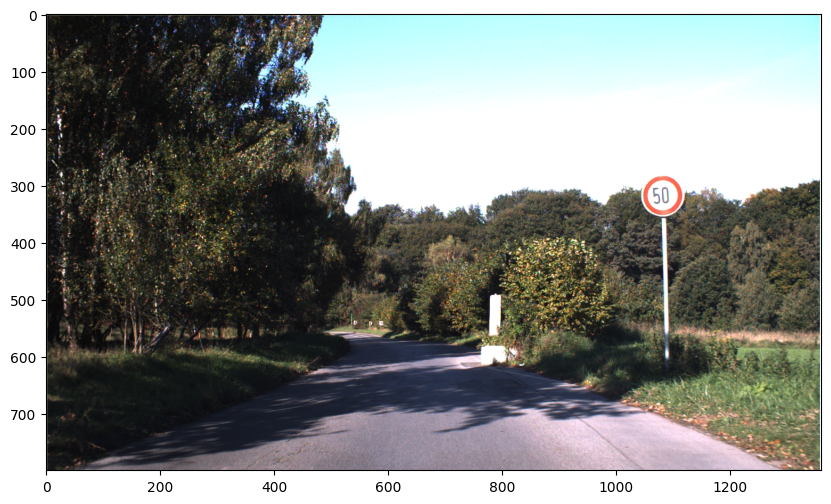

In [ ]:
im = cv.imread('/content/TrainIJCNN2013/00013.ppm',1)
print(im.shape)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
h=im.shape[0]
w=im.shape[1]
plt.figure(figsize=(10,10))
plt.imshow(im)

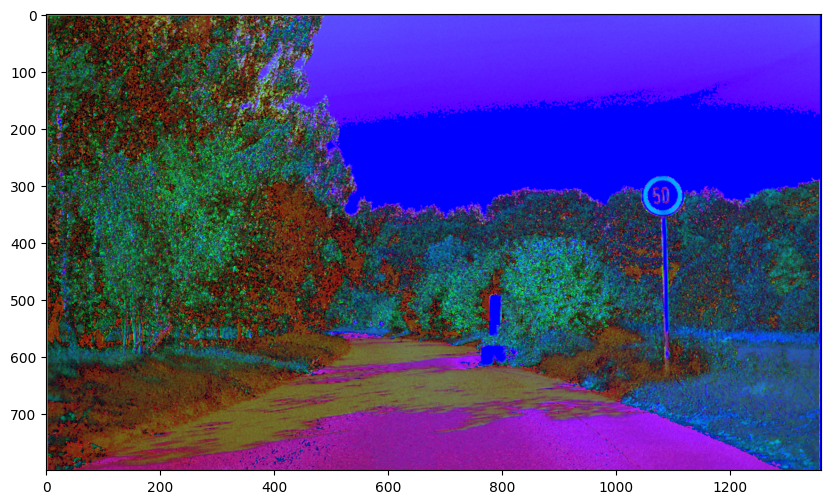

In [ ]:
HSV = cv.cvtColor(im, cv.COLOR_RGB2HSV)
plt.figure(figsize=(10,10))
plt.imshow(HSV)

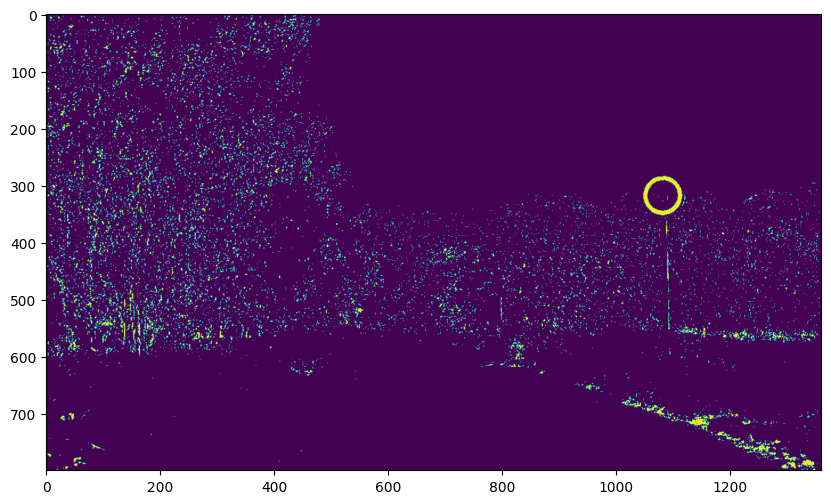

In [ ]:
bin1=cv.inRange(HSV, (0, 80, 0), (12, 255, 255))
bin2=cv.inRange(HSV, (160, 80, 0), (180, 255, 255))
bin3=cv.bitwise_or(bin1,bin2)
plt.figure(figsize=(10,10))
plt.imshow(bin3)

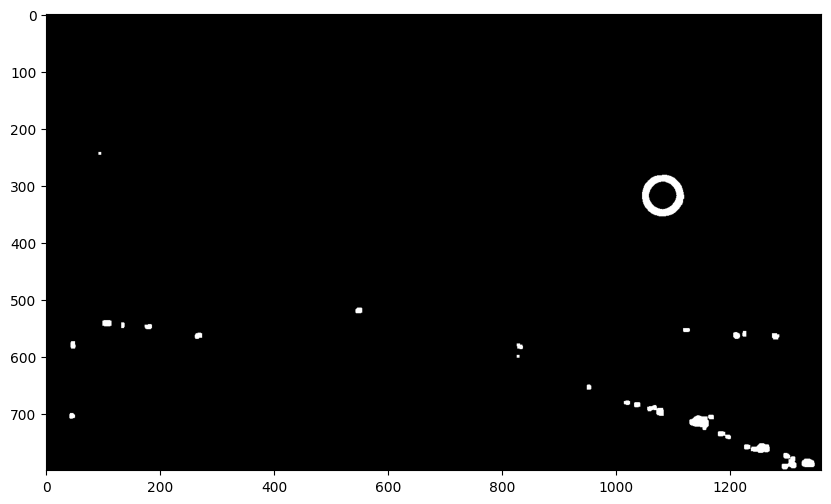

In [ ]:
dst = cv.medianBlur(bin3,9)
kernel = np.ones((5,5),np.uint8)
dilated = cv.dilate(dst,kernel)
plt.figure(figsize=(10,10))
plt.imshow(dilated,cmap='gray')

Number of contours : 27


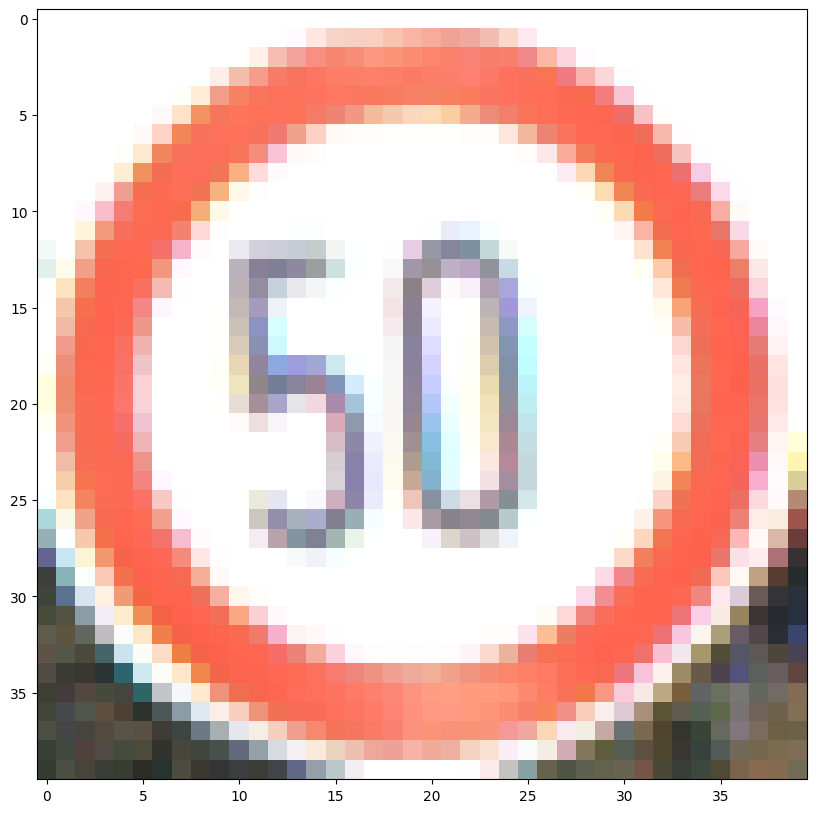

In [ ]:
contours,_ = cv.findContours(dilated, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
Rois=[]
Rect=[]
print("Number of contours : "+str(len(contours)))
for c in contours:
  x,y,w,h=cv.boundingRect(c)
  if h>im.shape[0]/35 and w>im.shape[1]/35 and h<im.shape[0]/3 and w<im.shape[1]/3:
    roi = im[y:y+h, x:x+w]
    resized = cv.resize(roi, (40, 40), interpolation = cv.INTER_AREA)
    Rois.append(resized)
    Rect.append(cv.boundingRect(c))
plt.figure(figsize=(10,10))
plt.imshow(Rois[0])

# **the beginning of the assignement**
*   autor : *youssef hajaj*
*   date : 15/11/2024
*   Editor : VsCode
*   Note! : i m using different dataset wich contains more images .png



# ***all the files you need in this notebook i will provide a link to my drive in the end of the notebook***

In [ ]:
# that s the data set i m using it pretty much the same that you provide us with
# the only difference is that there is more images type png so my trained model be more accurate

from google.colab import drive
drive.mount('/content/drive')

zip_file_path = '/content/drive/My Drive/DataSciencePanneauxRoutier/myData.zip'

!unzip -q "{zip_file_path}" -d "/content/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

main_directory = '/content/myData'

subdirectories = [str(i) for i in range(43) if os.path.isdir(os.path.join(main_directory, str(i)))]

for subdir in subdirectories:
    subdir_path = os.path.join(main_directory, subdir)
    item_count = len(os.listdir(subdir_path))
    print(f"Folder '{subdir}' contains {item_count} items.")

Folder '0' contains 180 items.
Folder '1' contains 1980 items.
Folder '2' contains 2010 items.
Folder '3' contains 1260 items.
Folder '4' contains 1770 items.
Folder '5' contains 1650 items.
Folder '6' contains 360 items.
Folder '7' contains 1290 items.
Folder '8' contains 1260 items.
Folder '9' contains 1320 items.
Folder '10' contains 1800 items.
Folder '11' contains 1170 items.
Folder '12' contains 1890 items.
Folder '13' contains 1920 items.
Folder '14' contains 690 items.
Folder '15' contains 540 items.
Folder '16' contains 360 items.
Folder '17' contains 990 items.
Folder '18' contains 1080 items.
Folder '19' contains 180 items.
Folder '20' contains 300 items.
Folder '21' contains 270 items.
Folder '22' contains 330 items.
Folder '23' contains 450 items.
Folder '24' contains 240 items.
Folder '25' contains 1350 items.
Folder '26' contains 540 items.
Folder '27' contains 210 items.
Folder '28' contains 480 items.
Folder '29' contains 240 items.
Folder '30' contains 390 items.
Fold

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd
import os

**Parameters i used**


*   Note : i used a file named labels.csv for the classes



In [ ]:
csv_file_path = '/content/drive/My Drive/DataSciencePanneauxRoutier/labels.csv'

!cp "{csv_file_path}" "/content/"

In [ ]:
import pandas as pd

df = pd.read_csv('labels.csv')
print(df)

    ClassId                                               Name
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [ ]:
path = "myData"
labelFile = 'labels.csv'
batch_size_val=50
steps_per_epoch_val=2000
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.2
validationRatio = 0.2

**Importing of the Images**

In [ ]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


**Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

**TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET**

In [ ]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


**READ CSV FILE**

In [ ]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


**DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES**

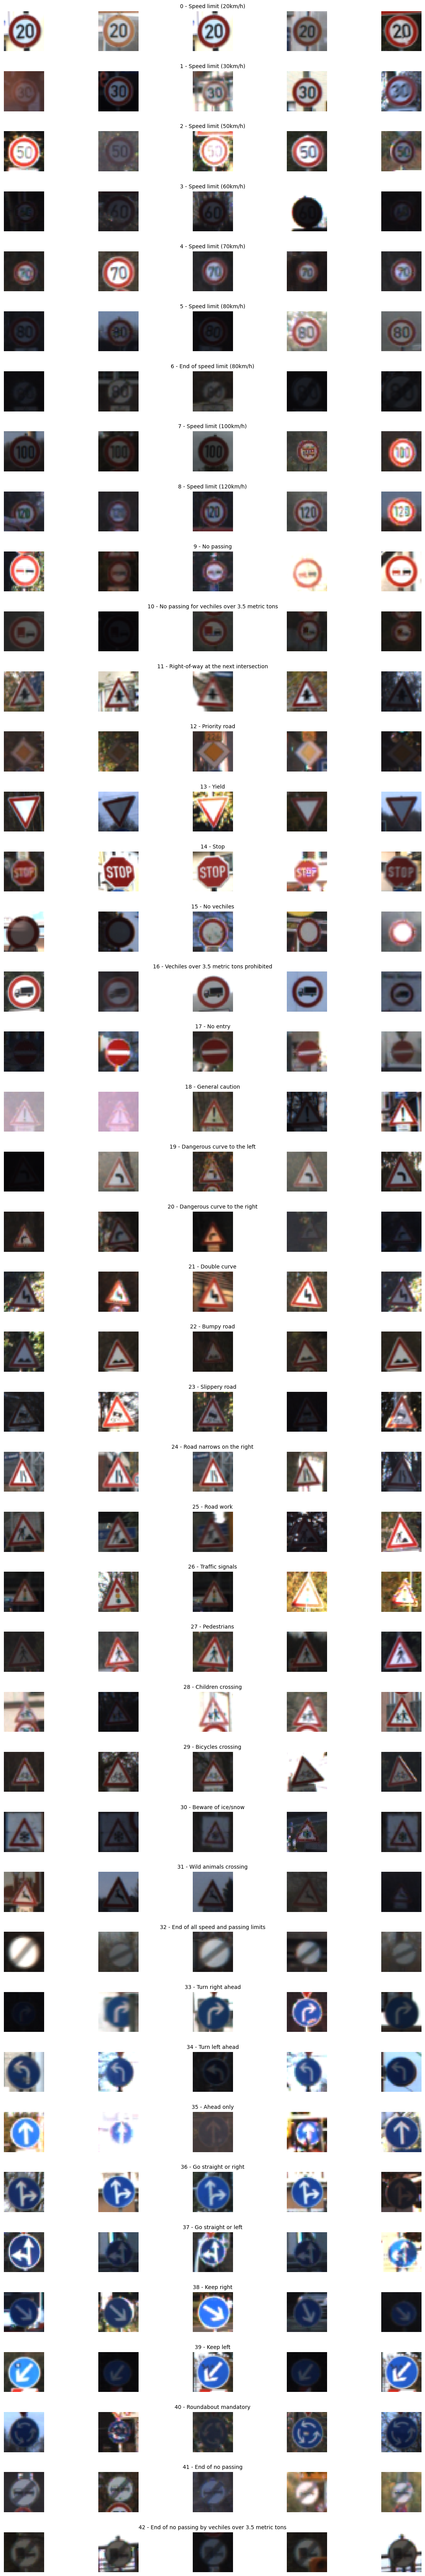

In [ ]:
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(15, num_classes * 2))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    for i in range(cols):
        if len(x_selected) > 0:
            axs[j, i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
            axs[j, i].axis("off")
            if i == 2:
                axs[j, i].set_title(f"{j} - {row['Name']}", fontsize=10)
    num_of_samples.append(len(x_selected))

plt.show()

**DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY**

[116, 1258, 1304, 801, 1168, 1036, 216, 848, 824, 826, 1155, 758, 1186, 1222, 427, 344, 221, 628, 678, 109, 188, 165, 206, 280, 166, 863, 361, 125, 316, 159, 252, 451, 133, 399, 240, 688, 216, 111, 1218, 162, 185, 127, 135]


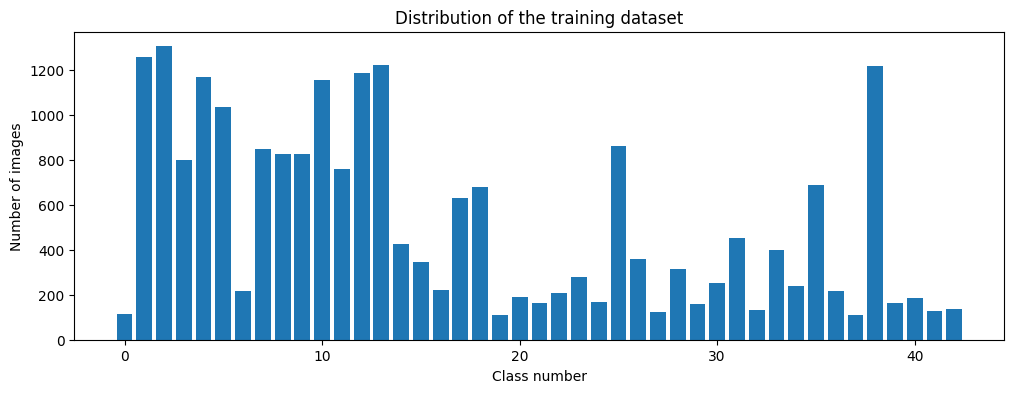

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

**PREPROCESSING THE IMAGES**

In [ ]:
def grayscale(img):
    if len(img.shape) == 3:  # Convert to grayscale if it's a color image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    if len(img.shape) == 2:  # Ensure it's a grayscale image
        img = img.astype(np.uint8)
        img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)      # Convert to grayscale
    img = equalize(img)       # Equalize histogram
    img = img / 255.0         # Normalize pixel values
    return img

In [ ]:
X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

Image 1:


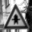

Image 2:


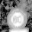

Image 3:


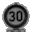

Image 4:


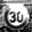

Image 5:


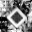

Image 6:


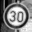

Image 7:


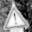

Image 8:


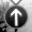

In [ ]:
num_images = 8
selected_images = random.sample(list(X_train), num_images)

for i, img in enumerate(selected_images):
    # Convert the normalized image (0-1) back to 0-255 for display
    img_display = (img * 255).astype(np.uint8)
    print(f"Image {i+1}:")
    cv2_imshow(img_display)

**ADD A DEPTH OF 1**

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

**AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC**

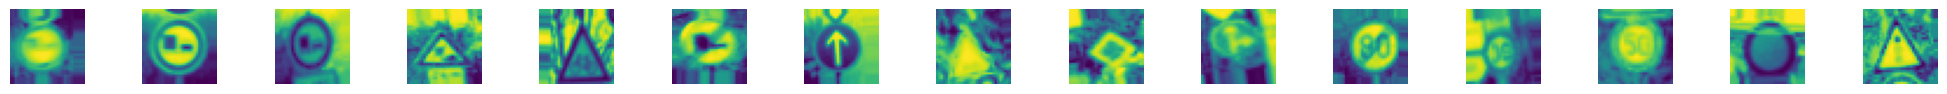

In [ ]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)

# TO SHOW AGMENTED IMAGE SAMPLES
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()


y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

**CONVOLUTION NEURAL NETWORK MODEL**

In [ ]:
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5) # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
                         # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500   # NO. OF NODES IN HIDDEN LAYERS
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool)) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS

    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(noOfClasses,activation='softmax')) # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

**trainning the model**

In [ ]:
model = myModel()
print(model.summary())
history = model.fit(dataGen.flow(X_train, y_train, batch_size=batch_size_val), steps_per_epoch=steps_per_epoch_val, epochs=epochs_val, validation_data=(X_validation, y_validation), shuffle=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 446/2000 ━━━━━━━━━━━━━━━━━━━━ 13:59 540ms/step - accuracy: 0.1515 - loss: 3.1494

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 264s 131ms/step - accuracy: 0.2595 - loss: 2.6860 - val_accuracy: 0.7069 - val_loss: 0.8647
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 259s 129ms/step - accuracy: 0.6187 - loss: 1.2364 - val_accuracy: 0.9104 - val_loss: 0.3427
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 259s 129ms/step - accuracy: 0.7447 - loss: 0.8113 - val_accuracy: 0.9574 - val_loss: 0.2041
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 258s 127ms/step - accuracy: 0.8014 - loss: 0.6388 - val_accuracy: 0.9639 - val_loss: 0.1285
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 253s 126ms/step - accuracy: 0.8316 - loss: 0.5308 - val_accuracy: 0.9653 - val_loss: 0.1206
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 264s 128ms/step - accuracy: 0.8510 - loss: 0.4695 - val_accuracy: 0.9585 - val_loss: 0.1090
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 252s 126ms/step - accuracy: 0.8710 - loss: 0.4109 - val_accuracy: 0.9680 - val_loss: 0.1034
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 264s 127ms/step - accuracy: 0.8

**showing the statistic of the trainning model**

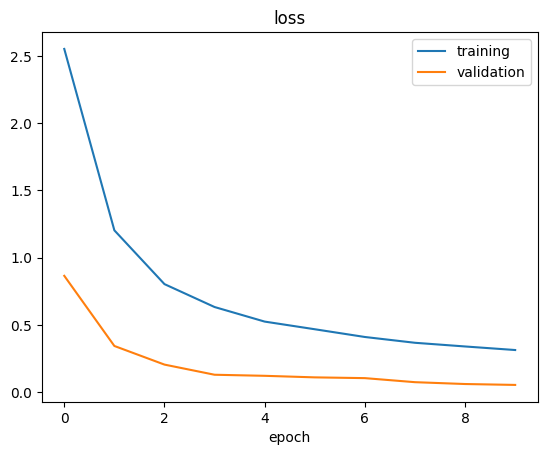

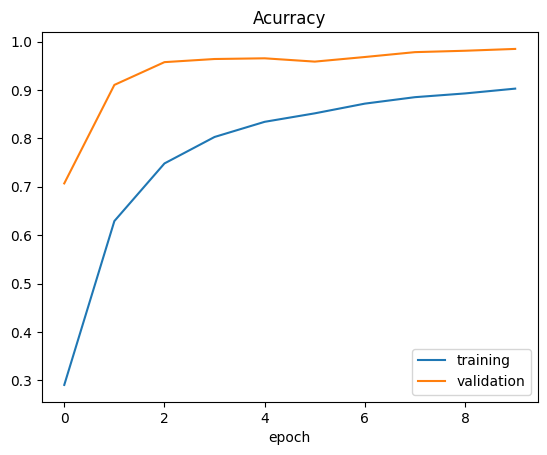

Test Score: 0.04889681562781334
Test Accuracy: 0.9866379499435425


In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

**STORE THE MODEL AS A PICKLE OBJECT**


*   you will find this trained model in my drive i will provide in the end of the notebook




In [ ]:
pickle_out= open("model_trained.p","wb")
pickle.dump(model,pickle_out)
pickle_out.close()
cv2.waitKey(0)

-1

# ***test the model***



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

trained_model_file_path = '/content/drive/My Drive/DataSciencePanneauxRoutier/model_trained_reconnaissance_des_panneaux_routiers.p'

!cp "{trained_model_file_path}" "/content/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install torch torchvision opencv-python Pillow

In [ ]:
import pickle

# Try loading the model using pickle
with open('/content/model_trained_reconnaissance_des_panneaux_routiers.p', 'rb') as f:
    model = pickle.load(f)

# Verify the model type
print(type(model))  # This will show what type of model you have


<class 'keras.src.models.sequential.Sequential'>


In [ ]:
import pickle
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
with open('/content/model_trained_reconnaissance_des_panneaux_routiers.p', 'rb') as f:
    model = pickle.load(f)

In [ ]:
print(type(model))

<class 'keras.src.models.sequential.Sequential'>


In [ ]:
def preprocess_image(image_path):
    image = Image.open(image_path)

    image = image.resize((32, 32)).convert('L')

    image_np = np.array(image) / 255.0

    image_np = np.expand_dims(image_np, axis=-1)

    image_np = np.expand_dims(image_np, axis=0)

    return image_np

In [ ]:
def predict_image(image_path):
    image_data = preprocess_image(image_path)
    prediction = model.predict(image_data)

    predicted_class_index = np.argmax(prediction)

    return predicted_class_index, prediction

In [ ]:
def getClassName(classNo):
    classes = [
        'Speed Limit 20 km/h', 'Speed Limit 30 km/h', 'Speed Limit 50 km/h', 'Speed Limit 60 km/h',
        'Speed Limit 70 km/h', 'Speed Limit 80 km/h', 'End of Speed Limit 80 km/h', 'Speed Limit 100 km/h',
        'Speed Limit 120 km/h', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection',
        'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry',
        'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve',
        'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians',
        'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits',
        'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left',
        'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons'
    ]

    return classes[classNo] if 0 <= classNo < len(classes) else 'Unknown Class'

In [ ]:
def display_result(image_path, predicted_class_index, prediction):
    image_cv = cv2.imread(image_path)
    image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

    cv2_imshow(image_cv)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    predicted_class_name = getClassName(predicted_class_index)

    print(f'Predicted class: {predicted_class_name}')
    print(f'Prediction probabilities: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


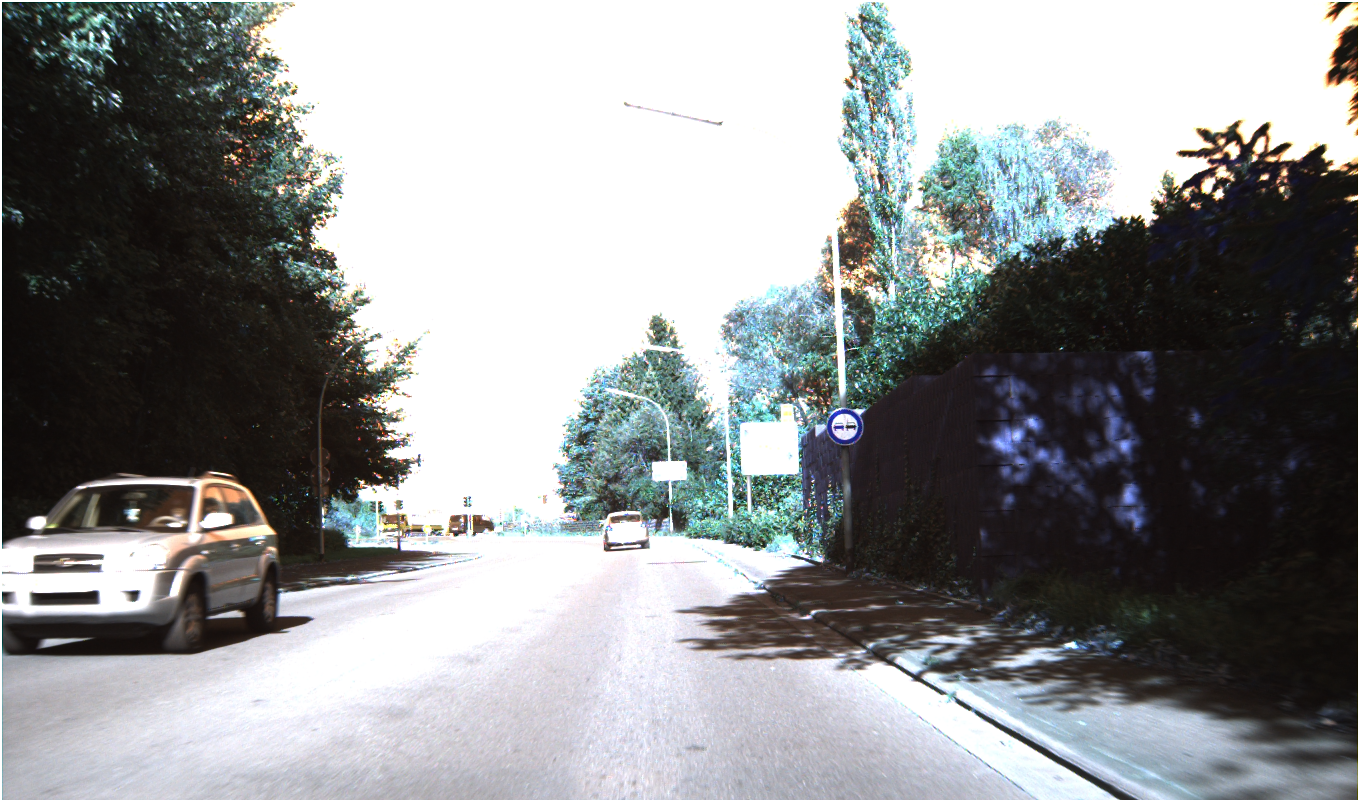

Predicted class: Go straight or right
Prediction probabilities: [[1.70307438e-04 1.17126834e-02 1.59668634e-04 3.43526248e-03
  1.32023124e-04 1.10520050e-03 2.10444666e-02 1.19183635e-04
  1.17539195e-04 1.14901020e-04 1.89195664e-04 4.38890457e-02
  7.04230275e-03 1.11742064e-01 4.14197519e-03 4.80193528e-04
  1.61754258e-04 4.22937388e-04 3.10304831e-03 2.09003410e-04
  4.74261539e-03 3.66588763e-04 8.58764048e-04 5.08164405e-04
  1.28240106e-04 2.05550133e-03 8.38865992e-04 1.24471681e-03
  9.07842368e-02 4.31019813e-04 3.17309098e-03 3.81365608e-05
  5.08982595e-03 1.00814342e-01 6.66236645e-03 8.11698735e-02
  2.30376095e-01 5.92949800e-03 2.88797878e-02 6.55237236e-04
  2.03184364e-03 4.24846774e-03 2.19480038e-01]]


In [ ]:
image_path = '/content/TrainIJCNN2013/00007.ppm'
predicted_class_index, prediction = predict_image(image_path)
display_result(image_path, predicted_class_index, prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


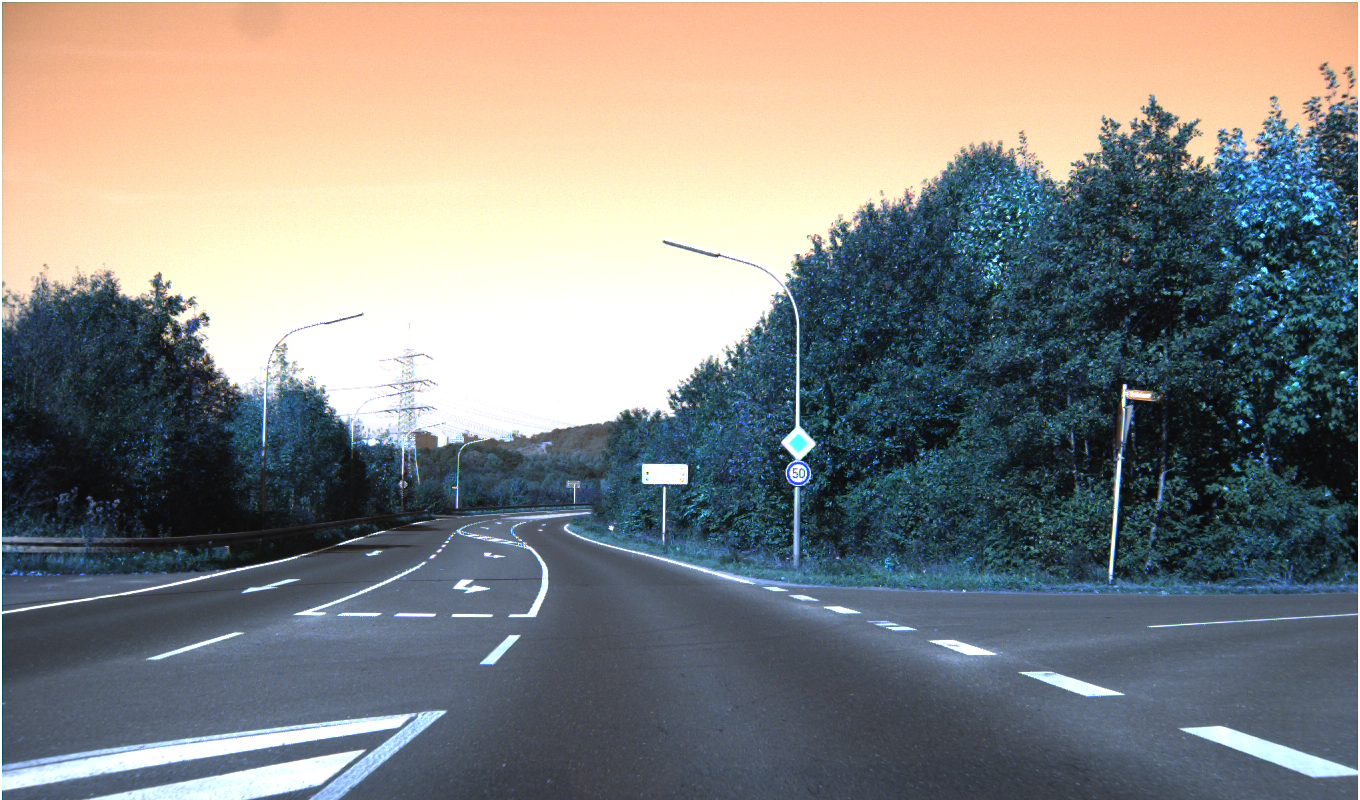

Predicted class: Yield
Prediction probabilities: [[1.34853258e-06 3.50467417e-05 7.48961247e-05 3.98342207e-04
  1.05138075e-04 2.01337243e-04 1.61091995e-03 2.30718753e-03
  4.44512349e-03 1.15614945e-04 9.59496174e-06 8.45238194e-03
  3.78471203e-02 7.94010758e-01 9.05050838e-04 3.61971150e-04
  3.01904092e-03 8.38897657e-03 1.22269348e-03 1.81699022e-06
  2.80414570e-05 9.92006171e-05 6.46495551e-04 1.50442484e-05
  1.17315394e-04 3.61743197e-03 2.07004574e-04 8.89896255e-05
  4.78105008e-04 5.47009295e-05 2.65068579e-02 1.76100351e-04
  1.41929574e-02 4.91378969e-03 1.07470166e-03 5.50333534e-05
  3.40405427e-06 2.99194740e-04 9.45126731e-03 6.65781572e-02
  9.48710425e-04 5.14880707e-03 1.78429182e-03]]


In [ ]:
image_path = '/content/TrainIJCNN2013/00008.ppm'
predicted_class_index, prediction = predict_image(image_path)
display_result(image_path, predicted_class_index, prediction)

this is my drive folder that contains all the ressources

[https://drive.google.com/drive/folders/1jPAeV_IanIhfIaHXWKvTarie24AJOmu4?usp=drive_link](https://drive.google.com/drive/folders/1jPAeV_IanIhfIaHXWKvTarie24AJOmu4?usp=drive_link)

if you counter any problem accessing the link contact me in : youssef.hajaj111@gmail.com

# Nouvelle section

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2 as cv
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib

data_dir = pathlib.Path('/content/TrainIJCNN2013') # Convert data_dir to a pathlib.Path object

image_count = len(list(data_dir.glob('*/*.ppm'))) # Now data_dir.glob will work
print(list(data_dir.glob('*/*.ppm'))[0])

/content/TrainIJCNN2013/20/00000.ppm


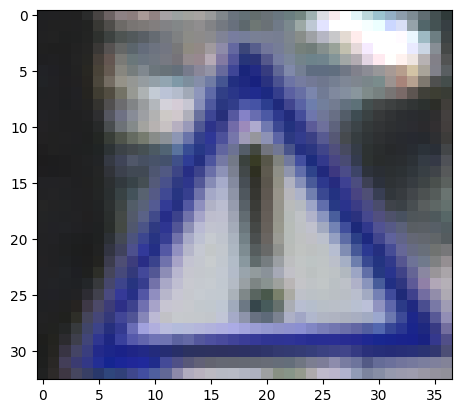

In [ ]:
im=cv.imread(str(list(data_dir.glob('*/*.ppm'))[1]),1)
plt.imshow(im)

In [ ]:
im.shape

(33, 37, 3)

In [ ]:
from PIL import Image
import pathlib
import os

data_dir = pathlib.Path('/content/TrainIJCNN2013')
output_dir = pathlib.Path('/content/TrainIJCNN2013_ConvertedImages')

output_dir.mkdir(parents=True, exist_ok=True)

for ppm_image_path in data_dir.glob('**/*.ppm'):
    relative_path = ppm_image_path.relative_to(data_dir)
    output_subdir = output_dir / relative_path.parent
    output_subdir.mkdir(parents=True, exist_ok=True)

    with Image.open(ppm_image_path) as img:
        output_image_path = output_subdir / (ppm_image_path.stem + '.jpg')
        img.convert('RGB').save(output_image_path, 'JPEG')

    print(f"Converted {ppm_image_path} to {output_image_path}")

Converted /content/TrainIJCNN2013/00534.ppm to /content/TrainIJCNN2013_ConvertedImages/00534.jpg
Converted /content/TrainIJCNN2013/00160.ppm to /content/TrainIJCNN2013_ConvertedImages/00160.jpg
Converted /content/TrainIJCNN2013/00127.ppm to /content/TrainIJCNN2013_ConvertedImages/00127.jpg
Converted /content/TrainIJCNN2013/00041.ppm to /content/TrainIJCNN2013_ConvertedImages/00041.jpg
Converted /content/TrainIJCNN2013/00570.ppm to /content/TrainIJCNN2013_ConvertedImages/00570.jpg
Converted /content/TrainIJCNN2013/00364.ppm to /content/TrainIJCNN2013_ConvertedImages/00364.jpg
Converted /content/TrainIJCNN2013/00433.ppm to /content/TrainIJCNN2013_ConvertedImages/00433.jpg
Converted /content/TrainIJCNN2013/00137.ppm to /content/TrainIJCNN2013_ConvertedImages/00137.jpg
Converted /content/TrainIJCNN2013/00209.ppm to /content/TrainIJCNN2013_ConvertedImages/00209.jpg
Converted /content/TrainIJCNN2013/00101.ppm to /content/TrainIJCNN2013_ConvertedImages/00101.jpg
Converted /content/TrainIJCNN2

In [ ]:
data_dir = pathlib.Path('/content/TrainIJCNN2013_ConvertedImages')

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 853 files belonging to 43 classes.
Using 683 files for training.
Found 853 files belonging to 43 classes.
Using 170 files for validation.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,994,187 (15.24 MB)

 Trainable params: 3,994,187 (15.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.0813 - loss: 3.6406 - val_accuracy: 0.1706 - val_loss: 3.1612
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2587 - loss: 2.8716 - val_accuracy: 0.4353 - val_loss: 2.3752
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4356 - loss: 2.1541 - val_accuracy: 0.5412 - val_loss: 1.7372
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5774 - loss: 1.5470 - val_accuracy: 0.6176 - val_loss: 1.4622
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7136 - loss: 1.0318 - val_accuracy: 0.6529 - val_loss: 1.2436
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7840 - loss: 0.7780 - val_accuracy: 0.7471 - val_loss: 0.9541
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8622 - loss: 0.4905 - val_accuracy: 0.7353 - val_loss: 0.9749
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8982 - loss: 0.3686 - val_accuracy: 0.8353 - 

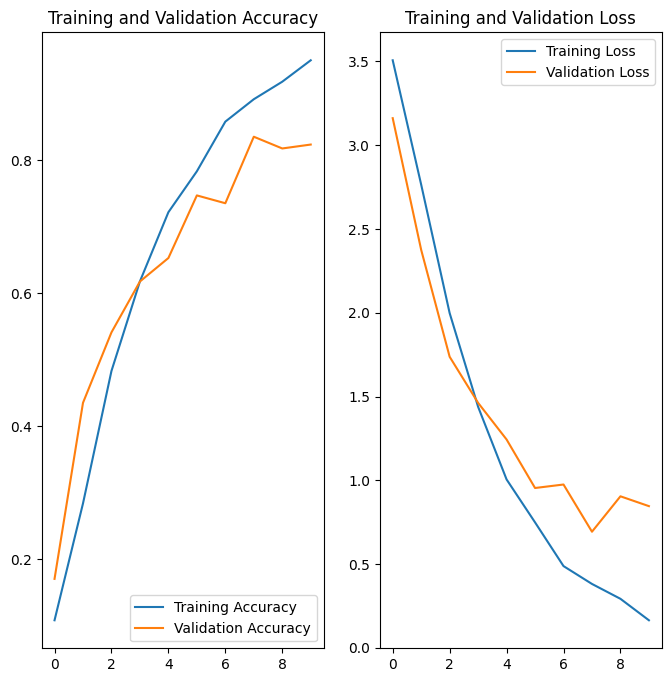

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.0665 - loss: 3.6627 - val_accuracy: 0.1647 - val_loss: 3.3312
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1490 - loss: 3.2668 - val_accuracy: 0.2118 - val_loss: 3.0845
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.2137 - loss: 2.9381 - val_accuracy: 0.3294 - val_loss: 2.6921
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.3264 - loss: 2.5385 - val_accuracy: 0.3235 - val_loss: 2.3147
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3405 - loss: 2.2494 - val_accuracy: 0.4118 - val_loss: 2.1049
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3910 - loss: 2.0792 - val_accuracy: 0.4588 - val_loss: 1.8902
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4358 - loss: 1.8413 - val_accuracy: 0.5294 - val_loss: 1.6525
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.4631 - loss: 1.6890 - val_accuracy: 0.5235 - v

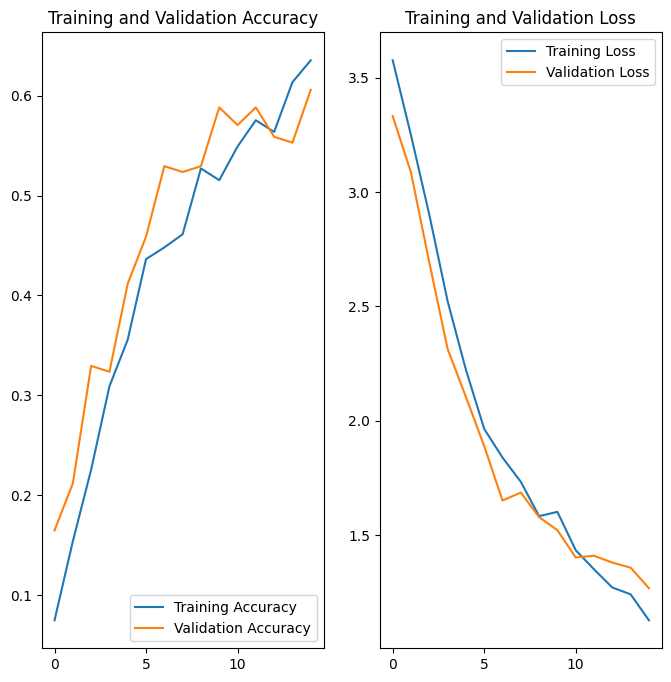

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()